## A Fraud: A how-to guide
### by Berfin Karaman


To generate a month worth transaction history based on the existing data, I will use density modelling. Histograms are a statistical tool to illustrate the frequency of the values. However, since we are trying to fraud, we should use a more precise density modelling. Kernel density estimation weitgts each point individually. Therefore, I used various Kernel density estimations. I illustrated the data with various kernels such as gaussian, tophat, cosine, epanechnikov, exponential. However, I could only sample from gaussian, tophat due to the limitation of sklearn.neighbors.kde. Additionally, I used sklearn.model_selection.GridSearchCV to find the kernels and the bandwidth values for the best estimator.



In [22]:
#importing the libraries

import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors.kde import KernelDensity
from sklearn.model_selection import GridSearchCV
#I will ignore the deprication and runtime warnings to have a more readable and presentable code
import warnings
warnings.filterwarnings("ignore")

In [23]:
#importing the data set of transactions

data = pd.read_csv('trans.csv')
data.head()

,Date,Amount
0,25May2016,54241.35
1,29May2017,54008.83
2,30Jun2017,54008.82
3,05Jan2017,52704.37
4,23Feb2017,52704.36


In [24]:
#transforiming the data column into datetime format 
data['Date'] = pd.to_datetime(data['Date'])

#creating a different columns for day, year and month
day = data['Date'].dt.day
year = data['Date'].dt.year
month = data['Date'].dt.month

day.name = 'Day'
year.name = 'Year'
month.name = 'Month'

data = pd.concat([data, day, month, year], axis=1)
data.head()

,Date,Amount,Day,Month,Year
0,2016-05-25,54241.35,25,5,2016
1,2017-05-29,54008.83,29,5,2017
2,2017-06-30,54008.82,30,6,2017
3,2017-01-05,52704.37,5,1,2017
4,2017-02-23,52704.36,23,2,2017


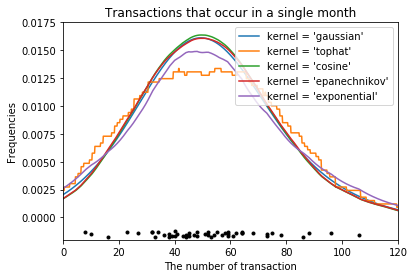

In [25]:
#aggeragated monthly spendings to find out the number of transactions per month
month_agg = data['Date'].groupby([data.Date.dt.year, data.Date.dt.month]).count()

#reshaping the array for kernel
month_agg = month_agg.values[:,np.newaxis] 

#defining the upper and lower limits
X_plot = np.linspace(0, 120, 1000)[:, np.newaxis]
fig, ax = plt.subplots()

#defining the kernels for the number of transactions per month
kernels=['gaussian', 'tophat', 'cosine','epanechnikov','exponential']
    
#for loop to find the best estimates using the grid search cross validation
for kernel in kernels:
    params = {'bandwidth': np.logspace(-1, 5, 20)}
    grid = GridSearchCV(KernelDensity(kernel=kernel), params, cv=3)
    grid.fit(month_agg)
    kde_month = grid.best_estimator_
    log_dens = kde_month.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-', label="kernel = '{0}'".format(kernel))

      
plt.title("Transactions that occur in a single month")
ax.legend(loc='upper right')
ax.plot(month_agg[:, 0], -0.00125 - 0.0005 * np.random.random(month_agg.shape[0]),  '.k')


#setting the lower limit to 0 because the number of transactions cannot be negative
#based on np.max(month_agg)=106, I set the max to 120 to include all the points
ax.set_xlim(0, 120)
#setting the lower limit to -.002 because frequencies cannot be lower than 0
#but I would like to show the datapoints
#based on maximum value of 0.01611197211417717, I set the max to .0175
ax.set_ylim(-0.002, .0175)
ax.set_xlabel('The number of transaction')
ax.set_ylabel('Frequencies')
plt.show()

#source for graph=https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
#source for grid=https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#sphx-glr-auto-examples-neighbors-plot-digits-kde-sampling-py

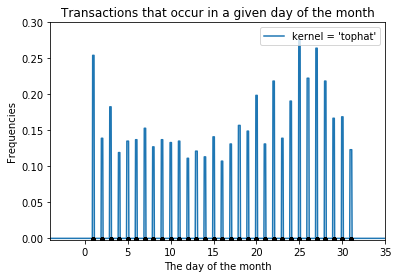

In [26]:
#the day in the month that a transaction will occur on

#reshaping the day array for the kernel
day = day.values[:,np.newaxis] 

#defining the upper and lower limits
X_plot = np.linspace(-4, 35, 1000)[:, np.newaxis]
fig, ax = plt.subplots()

#using only tophat kernel because there is only 30 value and it looks like a histogram
kernels=['tophat']
    
#for loop to find the best estimates using the grid search cross validation
for kernel in kernels:
    params = {'bandwidth': np.logspace(-1, 5, 20)}
    grid = GridSearchCV(KernelDensity(kernel=kernel), params, cv=3)
    grid.fit(day)
    kde_day = grid.best_estimator_
    log_dens = kde_day.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-', label="kernel = '{0}'".format(kernel))


       
plt.title("Transactions that occur in a given day of the month")
ax.legend(loc='upper right')
ax.plot(day[:, 0], -0.00125 - 0.0005 * np.random.random(day.shape[0]),  '.k')


#The range of the x values will be between 0 and 31
#I will be setting the lower limit to -4 and upper limit to 35 for a nicer visualisation
ax.set_xlim(-4, 35)
#setting the lower limit to -.002 because frequencies cannot be lower than 0
#but I would like to show the datapoints
#based on maximum value of 0.28, I set the max to .3
ax.set_ylim(-0.002, .3)
ax.set_xlabel('The day of the month')
ax.set_ylabel('Frequencies')
plt.show()


#source for graph=https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
#source for grid=https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#sphx-glr-auto-examples-neighbors-plot-digits-kde-sampling-py

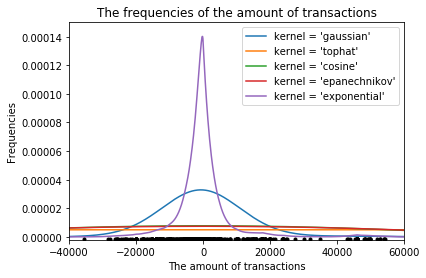

In [27]:
#transaction size

#creating an array with only the amounts and reshaping it for the kernel
amount = data['Amount']
amount = amount.values[:,np.newaxis]  

#defining the upper and lower limits
X_plot = np.linspace(-40000, 60000, 1000)[:, np.newaxis]
fig, ax = plt.subplots()

#The kernels thta I would like to try
kernels=['gaussian', 'tophat','cosine','epanechnikov','exponential']
    
#for loop to find the best estimates using the grid search cross validation
for kernel in kernels:
    params = {'bandwidth': np.logspace(-1, 5, 20)}
    grid = GridSearchCV(KernelDensity(kernel=kernel), params, cv=3)
    grid.fit(amount)
    kde_amount = grid.best_estimator_
    log_dens = kde_amount.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-', label="kernel = '{0}'".format(kernel))

#sampling from the kde to use in the fake month data    
#fake_amount_data = kde_amount.sample(1, random_state=0)
       
plt.title("The frequencies of the amount of transactions")
ax.legend(loc='upper right')
ax.plot(amount[:, 0], -0.00000125 - 0.0000005 * np.random.random(amount.shape[0]),  '.k')


#setting the lower limit to -40000 because of the minimum value of the amount
#based on maximum value, I set the upper limit to 600000 to include all the points
ax.set_xlim(-40000, 60000)
#setting the lower limit to -.0000002 because frequencies cannot be lower than 0
#but I would like to show the datapoints
#based on max frequency, I set the max to .00015
ax.set_ylim(-0.000002, .00015)
ax.set_xlabel('The amount of transactions')
ax.set_ylabel('Frequencies')
plt.show()
#source for graph=https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
#source for grid=https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#sphx-glr-auto-examples-neighbors-plot-digits-kde-sampling-py

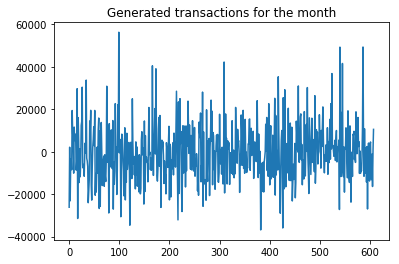

In [32]:
#Sampling from these density models, create a fraudulent month of personal transactions.


kernels=['gaussian','tophat']
for kernel in kernels:
    params = {'bandwidth': np.logspace(-1, 5, 20)}
    grid = GridSearchCV(KernelDensity(kernel=kernel), params, cv=3)
    grid.fit(month_agg)
    kde_month = grid.best_estimator_
kernels=['gaussian']
for kernel in kernels:
    params = {'bandwidth': np.logspace(-1, 5, 20)}
    grid = GridSearchCV(KernelDensity(kernel=kernel), params, cv=3)
    grid.fit(amount)
    kde_amount = grid.best_estimator_    


#sampling from the kde to use in the fake month data 
#sampling only one because we need to know the number of transaction for one month
fake_month_data = kde_month.sample(1, random_state=0).astype(int)


#sampling from the kde of day    
fake_day_data = kde_day.sample((fake_month_data [0][0]), random_state=0).astype(int)

fake_amount_data = kde_amount.sample(sum(fake_day_data), random_state=0).astype(int)



plt.title("Generated transactions for the month")
plt.plot(fake_amount_data)

In [60]:
print(fake_amount_data)

[[-26174]
 [  2138]
 [-23166]
 [ -6428]
 [ -3291]
 [ -8511]
 [ 19429]
 [  8725]
 [  4447]
 [-10101]
 [ 11623]
 [  5285]
 [  8352]
 [  7170]
 [ -8667]
 [ -4589]
 [ 29737]
 [-31477]
 [ 16083]
 [  4447]
 [-14515]
 [  1254]
 [-11830]
 [ -4953]
 [ 12418]
 [ 14162]
 [ 30423]
 [ -6452]
 [ -7733]
 [ -5978]
 [-11558]
 [ -1878]
 [  4120]
 [  -741]
 [ 33772]
 [ -3073]
 [ -4345]
 [ -6991]
 [-24047]
 [-18324]
 [-13428]
 [ 14491]
 [  9425]
 [ 19521]
 [-15615]
 [-22812]
 [ -7497]
 [  1978]
 [  5540]
 [ 11709]
 [  2851]
 [ 19471]
 [-20512]
 [-10284]
 [-19024]
 [-10061]
 [  2216]
 [-10095]
 [ 10364]
 [ 15883]
 [-26773]
 [  9764]
 [-25805]
 [  4522]
 [ 13786]
 [   606]
 [-15945]
 [ -6570]
 [ -4453]
 [ -2019]
 [-16290]
 [ -1455]
 [-11590]
 [-14051]
 [ -3592]
 [ 30888]
 [ -4411]
 [ -5013]
 [ 12095]
 [-28891]
 [ 13245]
 [ -7306]
 [  4850]
 [   431]
 [ 10286]
 [ -3086]
 [ -7953]
 [ 14695]
 [-27057]
 [ -4770]
 [-15305]
 [ -9173]
 [ 22695]
 [ -1203]
 [  2130]
 [-20148]
 [ -8618]
 [ 22218]
 [  2504]
 [ 56335]


#### Evaluation 

While creating the fake data for the month, there were 3 main parameters that were considered. Firstly, I used the density function to estimate the number of transaction for the fraudulent month. Then based on this value, I samples from the density function for the days of the month to have a realistic distribution of the day of trnasactions. Lastly, based on the day data, I samples from the density function of the transaction amounts. When I cheked for the Benford's law, I realized that I did not violated the law because 1 appears almost 30% of the time as the first digit, while 9 appears around 5% of the time as the first digit.


Even though, I didn't fail Benford's law, there are numerous other things that could have been taken into consideration to fake the data for the month. For example, we do not know if there is a seasonal trend for the data because we did not examined the trend of the data through out the year. I believe that it is highly likely that there will be a seasonal pattern to the spendings of an individual such as more spending during the holiday season due to travels, etc. If we knew the specific month that we were generating data for, we could have take this into account. 

Another pitfall of our model is that the only information we have towards the transaction is date and the amount. If we knew more details about the transaction such as type, retailer, etc., we could make better estimates. For example if we knew, which transactions are grocery related, we could acount for the avarage amount for the groceries per month. Or if there is a constant expenditure, we could account for that and added into the generated data.

Last but not least, we do not know the main reason why we generated a new month worth data. If the main aim was to hide thee transactions in a given month due to a specific reason, knowing the specific reason would enable us to account for other patterns in the data to avoid being flagged by the forensic. For example, if we are dealing drugs that we buy from the drugstore. It would be useful to track the pattern for our drugstore spendings to generate data that will make it seem like we didn't change our behaviour towards pharmacy shopping.


Note: All of these improvements are intended in a humorous way, and not intended to actual fraud!